In [416]:
#% Your goal of this assignment is implementing your own K-means.
#%
#% Input:
#%     pixels: data set. Each row contains one data point. For image
#%     dataset, it contains 3 columns, each column corresponding to Red,
#%     Green, and Blue component.
#%
#%     K: the number of desired clusters. Too high value of K may result in
#%     empty cluster error. Then, you need to reduce it.
#%
#% Output:
#%     class: the class assignment of each data point in pixels. The
#%     assignment should be 1, 2, 3, etc. For K = 5, for example, each cell
#%     of class should be either 1, 2, 3, 4, or 5. The output should be a
#%     column vector with size(pixels, 1) elements.
#%
#%     centroid: the location of K centroids in your result. With images,
#%     each centroid corresponds to the representative color of each
#%     cluster. The output should be a matrix with K rows and
#%     3 columns. The range of values should be [0, 255].
#%     
#%
#% You may run the following line, then you can see what should be done.
#% For submission, you need to code your own implementation without using
#% the kmeans matlab function directly. That is, you need to comment it out.

from sklearn.cluster import KMeans
from scipy.spatial import distance
import warnings
import numpy as np

def my_kmeans(image_data, K):
    
    # randomly choose K data points as initial centroids
    centers = image_data[np.random.randint(low = 0, high =image_data.shape[0], size=K),:].astype(float)
    

    # create a empty array to store cluster info
    image_cluster = np.zeros(image_data.shape[0]).astype(int)
    warnings.filterwarnings("ignore")
    
    def update_centers(image_cluster, K, centers): #update the coordinates of the new centroids
        for i in range(K):
            if (image_cluster==i).any(): # if a cluster is not empty
                new_center = np.mean(image_data[image_cluster==i],axis=0)# get the mean coordinates of the centroids
                centers[i] = new_center
            else: # if a cluster is empty
                centers[i] = np.nan # change coordinates as nan
                K = K-1 # delete one cluster from K
        centers = centers[~np.isnan(centers).any(axis=1)] # remove the empty cluster centeroid
    
        return centers, K
    
    def dist_cal (image_cluster, centers, K): # calculate the distance between each data point to each center
                                          # then find the closest center, and store that info
            
        dist = distance.cdist(image_data,centers,'euclidean') #calculate the euclidean distance between each data point and each clsuter center
        
        for i in range(len(image_cluster)): #find the closest center, and store that info
            image_cluster[i] = dist[i].argmin()
        
        centers, K = update_centers(image_cluster, K, centers) # update centroids coordiantes
        return image_cluster, centers, K
    
    n =0
    
    while n<=300: # 300 iteration max
        centers_old = centers.copy() # hold the cluster info before update
        
        image_cluster, centers_new, K = dist_cal(image_cluster, centers, K)
        if centers_new.shape == centers_old.shape:
            v = centers_new == centers_old # compare the updated and unupdated centroid coordinates
            if v.all() == False: # if not the same, then continue
                centers = centers_new
            else: # if the same, stop
                centers = centers_new
                break
        else:
            centers = centers_new
        n += 1
    
    print ("Total iteration for k-means:", n)
    return image_cluster, centers

In [417]:
from scipy.spatial import distance
import numpy as np

def my_kmedoids(image_data, K):
    
    # randomly choose K data points as initial centroids
    centers = image_data[np.random.randint(low = 0, high =image_data.shape[0], size=K),:]
    

    # create a empty array to store cluster info
    image_cluster = np.zeros(image_data.shape[0]).astype(int)

    def update_centers(image_data, centers, image_cluster): #update the coordinates of the new centroids
        for i in range(K):
            new_center = np.mean(image_data[image_cluster==i],axis=0)# get the mean coordinates for each cluster (cluster center)
            centers[i] = new_center #store those mean coordinates for each cluster (cluster center)
            
        dist = distance.cdist(image_data, centers, 'cityblock') # calculate the Manhattan distance between each data point and each clsuter center
        for i in range(K):
            index = dist[:,i].argmin() # find the index for the closest data point to the cluster center
            centers[i] = image_data[index] # use the coordinates of the closest point as the medoids
        return centers
    
    def dist_cal(image_cluster, centers): # calculate the distance between each data point to each medoid
                                          # then find the closest medoid, and store that info.
        
        dist = distance.cdist(image_data,centers,'cityblock') #calculate the Manhattan distance
        for i in range(len(image_cluster)): #find the closest medoid, and store that info
            image_cluster[i] = dist[i].argmin()
        
        centers = update_centers(image_data,centers, image_cluster)
        return image_cluster, centers
    
    n =0
    
    while n<=300: # 300 iteration max
        centers_old = centers.copy() # hold the cluster info before update
        
        image_cluster, centers_new = dist_cal(image_cluster, centers)

        v = centers_new == centers_old # compare the updated and unupdated centroid coordinates
        if v.all() == False: # if not the same, then continue
            centers = centers_new
        else: # if the same, stop
            centers = centers_new
            break
            
        n += 1
    print ("Total iteration for k_mediods:", n)
    return image_cluster, centers

Total iteration for k-means: 25
Total iteration for k_mediods: 10


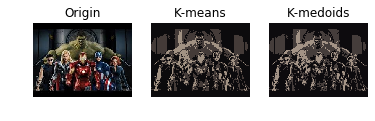

In [419]:
#% This is a simple example to help you test your implementation using
#% an image. Please feel free to use the attached images, or your own
#% images.
#%
#% An example of running this script is
#%   homework1('beach.bmp', 4);
#%
#% You are not supposed to edit this file. Your job is implementing k-means
#% and k-medoids in the other files, mykmeans.m and mykmedoids.m. Have fun!


import matplotlib.pyplot as plt
import numpy as np

#from my_sol_kmeans import my_kmeans
#from my_sol_kmedoids import my_kmedoids

def score(image_name, K):
    image = plt.imread(image_name)
    rows = image.shape[0]
    cols = image.shape[1]
    pixels = np.zeros((rows*cols,3))

    for i in range(rows):
        for j in range(cols):
            pixels[j*rows+i,:] = image[i,j,:]
    
    class1, centroid1 = my_kmeans(pixels, K)
    class2, centroid2 = my_kmedoids(pixels, K)
    
    converted_image1 = np.zeros((rows, cols, 3))
    converted_image2 = np.zeros((rows, cols, 3))
    
    for i in range(rows):
        for j in range(cols):
            converted_image1[i,j,:] = centroid1[class1[j*rows+i],:]
            converted_image2[i,j,:] = centroid2[class2[j*rows+i],:]
            
    converted_image1 /= 255
    converted_image2 /= 255
    
    plt.subplot(1,3,1)
    plt.title('Origin')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.title('K-means')
    plt.imshow(converted_image1)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.title('K-medoids')
    plt.imshow(converted_image2)
    plt.axis('off')
    
    plt.show()
    return None
    
score('/home/zhang/Desktop/ISYE6740/HW2/image.bmp', 3)

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv("/home/zhang/Desktop/ISYE6740/HW2/nodes.txt", sep="\t", header = None)
edge = pd.read_csv("/home/zhang/Desktop/ISYE6740/HW2/edges.txt", sep="\t", header = None)

nan_data = data[2][np.isnan(data[2])]

print ("here are some data points labelled NaN\n", nan_data)


# get the list of both origin and destination
node_from = edge[0]
node_to = edge[1]

# initiate a matrix with dismension 1490x1490
A = np.zeros((1490,1490))

# update the adjacency matrix based on edge info
for i in range(edge.shape[0]): 
    A[node_from[i]-1,node_to[i]-1] += 1

# calculate the diagonal matrix
D = np.diag(A.sum(axis=1))

# get the Laplacian matrix
L = D - A

# calculate the eigenvalues and eigenvectors of L 
vals, vecs = np.linalg.eig(L)

# sort the eigenvalues and eigenvectors from small to large
vals = vals[np.argsort(vals)]
vecs = vecs[:,np.argsort(vals)]


# perform Kmeans with k=2, using the first 2 eigenvectors
kmeans = KMeans(n_clusters=2,random_state=6).fit(vecs[:,0:2].real)
label = kmeans.labels_

# remove NaN data
true_label = data[2][-np.isnan(data[2])]
label = np.delete(label,[55, 110])

false_classification_rate =  1 - sum(label == true_label)/len(true_label)
print ("The  false classification rate is:", false_classification_rate)

here are some data point labelled NaN
 55    NaN
110   NaN
Name: 2, dtype: float64
The  false classification rate is: 0.491263440860215


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px


food  = pd.read_csv("/home/zhang/Desktop/ISYE6740/HW2/food-consumption.csv")

# drop Sweden, Finland and Spain
remove = ['Sweden', "Finland", "Spain"]
food = food.loc[-food["Country"].isin(remove),:]

# store all countries' name
Country = food["Country"]

# minors the mean for each column.
food = food[food.columns.difference(['Country'])] - np.mean(food[food.columns.difference(['Country'])], axis=0)

# get the covariance matrix
food_cov = np.cov(food,rowvar=False)

# calculate the eigenvectors and eigenvalues of the covariance matrix
vals, vecs = np.linalg.eig(food_cov)

# sort them from high to low
vals = vals[np.argsort(-vals)]
vecs = vecs[:,np.argsort(-vals)]

# get principle component 1 and 2
PC1 = food.dot(vecs[:,0].transpose()).real
PC2 = food.dot(vecs[:,1].transpose()).real


PCA = pd.DataFrame(data={"Country":Country, "PC1":PC1, "PC2":PC2}).reset_index()
PCA = PCA.iloc[:,1:4]

K_means = KMeans(n_clusters=2).fit(PCA.iloc[:,1:3])
print (K_means.labels_)

PCA["prediction"] = K_means.labels_.astype(object)


# plot principle component 1 and 2, then label each data points
#p1 = sns.regplot(x='PC1',y='PC2', data=PCA,fit_reg=False,)
#for line in range(0,PCA.shape[0]):
#    p1.text(PCA.PC1[line]+1, PCA.PC2[line]+1, PCA.Country[line], horizontalalignment='left', size='medium', color='black')
#plt.show()


p2  = px.scatter(PCA, x='PC1',y='PC2',text="Country", color="prediction")
p2.update_traces(textposition='top center')
p2.show()

[1 0 0 1 0 0 1 0 0 0 1 1 1]


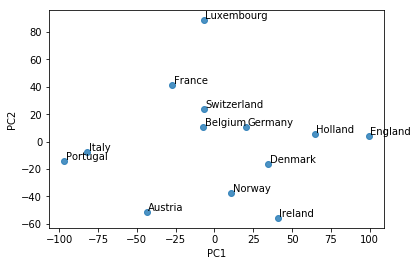

,index,Country,PC1,PC2
0,0,Germany,20.503263,10.451289
1,1,Italy,-82.045974,-7.693059
2,2,France,-27.321471,41.011802
3,3,Holland,64.624612,5.156200
4,4,Belgium,-7.342634,10.889950
5,5,Luxembourg,-6.765608,88.665308
6,6,England,99.460080,3.997989
7,7,Portugal,-96.644969,-14.420198
8,8,Austria,-43.561278,-51.762047
9,9,Switzerland,-7.007619,23.973572


In [215]:
from sklearn import  decomposition
from sklearn.preprocessing import StandardScaler

food  = pd.read_csv("/home/zhang/Desktop/ISYE6740/HW2/food-consumption.csv")

# drop Sweden, Finland and Spain
remove = ['Sweden', "Finland", "Spain"]
food = food.loc[-food["Country"].isin(remove),:]

food = pd.DataFrame(StandardScaler(with_std=False).fit_transform(food.iloc[:,1::]))


PCA = decomposition.PCA(n_components=2).fit_transform(food)
PCA = pd.DataFrame(data={"Country":Country, "PC1":PCA[:,0], "PC2":PCA[:,1]}).reset_index()
p1 = sns.regplot(x='PC1',y='PC2', data=PCA,fit_reg=False)
for line in range(0,principle_component.shape[0]):
    p1.text(PCA.PC1[line]+1, PCA.PC2[line]+1, PCA.Country[line], horizontalalignment='left', size='medium', color='black')
plt.show()

PCA

In [211]:
PCA

,Country,PC1,PC2,prediction
0,Germany,20.503263,-10.451289,0
1,Italy,-82.045974,7.693059,1
2,France,-27.321471,-41.011802,1
3,Holland,64.624612,-5.156200,0
4,Belgium,-7.342634,-10.889950,1
5,Luxembourg,-6.765608,-88.665308,1
6,England,99.460080,-3.997989,0
7,Portugal,-96.644969,14.420198,1
8,Austria,-43.561278,51.762047,1
9,Switzerland,-7.007619,-23.973572,1
